In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Alamat tempat menyimpan data di dalam Google drive
path1 = '/content/drive/MyDrive/Regresi_BigData/yorkshire.csv'
path2 = '/content/drive/MyDrive/Regresi_BigData/nutrition.csv'

In [3]:
import pandas as pd
dfY = pd.read_csv(path1)
dfNut = pd.read_csv(path2)

In [4]:
from sklearn import linear_model
import matplotlib.pyplot as plt


In [5]:
pip install -U scikit-learn

In [6]:
dfY = pd.read_csv(path1)
dfY.head()


id  age  gender      region        income married  children  car  \
0  ID12101   48  FEMALE  INNER_CITY  17546.000000      NO         1   NO   
1  ID12102   40    MALE        TOWN  30085.100000     YES         3  YES   
2  ID12103   51  FEMALE  INNER_CITY  16575.400000     YES         0  YES   
3  ID12104   23  FEMALE        TOWN  20375.400000     YES         3   NO   
4  ID12105   57  FEMALE       RURAL  15944.690366     YES         0   NO   

  mortgage  
0       NO  
1      YES  
2       NO  
3       NO  
4       NO

Text(0, 0.5, 'Income (£)')

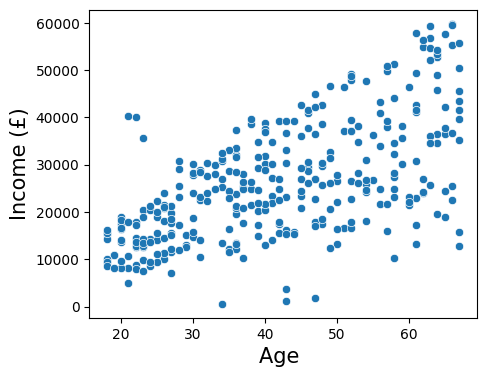

In [11]:
import seaborn as sns
plt.subplots(figsize=(5,4), dpi=100)
ax = sns.scatterplot(x="age", y="income", data=dfY, marker='o')
ax.set_xlabel('Age ',fontsize=15) # set x label
ax.set_ylabel('Income (£)',fontsize=15,rotation=90) # set y label


In [8]:
from sklearn import linear_model
# Create a linear regression object
regY = linear_model.LinearRegression()

# Train the model
regY.fit(dfY["age"].to_numpy().reshape(-1,1), dfY["income"])

LinearRegression()

In [12]:
print("Regression coefficient beta = %.3f" % (regY.coef_))
print("Intercept coefficient alpha = %.3f" % (regY.intercept_))

#α : intercept coefficient
#β : regression coefficient

Regression coefficient beta = 539.115
Intercept coefficient alpha = 3631.490


<ipython-input-12-25953461a9a0>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Regression coefficient beta = %.3f" % (regY.coef_))


In [13]:
import scipy.stats as stats
import numpy as np

#Analytically: Checking the closed-form formulae
#α : intercept coefficient
#β : regression coefficient
beta = stats.pearsonr(dfY["age"], dfY["income"])[0] * np.std(dfY["income"], ddof=1) / np.std(dfY["age"], ddof=1)

print("Regression coefficient beta = %.3f" % (beta))


alpha = np.mean(dfY["income"]) - beta * np.mean(dfY["age"])
print("Intercept coefficient alpha = %.3f" % (alpha))



Regression coefficient beta = 539.115
Intercept coefficient alpha = 3631.490


In [14]:
age = 34
income = regY.predict([[age]])
print("Income when you become %d would be £%.2f" % (age, income))

y = alpha + beta * age

print("Income when you become %d would be £%.2f (analytically)" %
(age, y))

print("Income = %.3f + %.3f x Age" % (regY.intercept_, regY.coef_))


Income when you become 34 would be £21961.40
Income when you become 34 would be £21961.40 (analytically)
Income = 3631.490 + 539.115 x Age


<ipython-input-14-dc0c26296cdc>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Income when you become %d would be £%.2f" % (age, income))
<ipython-input-14-dc0c26296cdc>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Income = %.3f + %.3f x Age" % (regY.intercept_, regY.coef_))


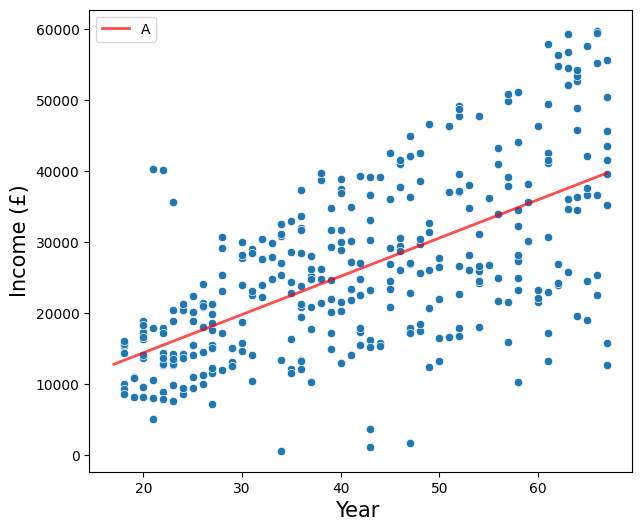

In [15]:
plt.subplots(figsize=(7,6), dpi=100)
ax = sns.scatterplot(x="age", y="income", data=dfY, marker='o')
ax.set_xlabel('Year ',fontsize=15) # set x label
ax.set_ylabel('Income (£)',fontsize=15,rotation=90) # set y label

min = dfY['age'].min()-1
max = dfY['age'].max()+1
model = regY.predict(np.arange(min,max).reshape(-1, 1))

ax = sns.lineplot(y=model, x=np.arange(min,max), linestyle='-', color="r",
label="A", alpha=0.7, lw=2)


In [16]:
dfNut = pd.read_csv(path2)
dfNut.head()


KnowledgeScore  CalciumIntake
0              10            450
1              42           1050
2              38            900
3              15            525
4              22            710

In [17]:
 #Independent: Knowledge score
 #Dependent: Calcium intake

In [18]:
plt.subplots(figsize=(5,4), dpi=100)

ax = sns.scatterplot(x="KnowledgeScore", y="CalciumIntake",
data=dfNut, marker='o')

ax.set_xlabel('Knowledge score ',fontsize=15) # set x label

ax.set_ylabel('Calcium Intake',fontsize=15,rotation=90) # set y label


Text(0, 0.5, 'Calcium Intake')

In [19]:
#Analytically
X = (dfNut["KnowledgeScore"]-np.mean(dfNut["KnowledgeScore"]))
Y = (dfNut["CalciumIntake"]-np.mean(dfNut["CalciumIntake"]))
r1 = np.sum(X*Y)/(dfNut.shape[0]-1)/np.std(dfNut["KnowledgeScore"],
ddof=1)/np.std(dfNut["CalciumIntake"], ddof=1)

#Using Scipy to compute Pearson correlation coefficient
r2,_ = stats.pearsonr(dfNut["KnowledgeScore"], dfNut["CalciumIntake"])

#Using Numpy to compute Pearson correlation coefficient
r3 =np.corrcoef(dfNut["KnowledgeScore"], dfNut["CalciumIntake"])
print("R1: %.3f" % (r1))
print("R2: %.3f" % (r2))
print("R3: %.3f" % (r3[0][1]))


R1: 0.882
R2: 0.882
R3: 0.882


In [20]:
# Ada korelasi yang kuat antara skor pengetahuan dan asupan kalsium.
# Model regresi memiliki bentuk liner.


In [21]:
dfNutX = pd.DataFrame(dfNut['KnowledgeScore'])

dfNutY = dfNut.drop('KnowledgeScore',
axis='columns')

regNut = linear_model.LinearRegression()
regNut.fit(dfNutX, dfNutY)


LinearRegression()

In [22]:
print("Regression coefficient beta = %.3f" % (regNut.coef_))
print("Intercept coefficient alpha = %.3f" % (regNut.intercept_))
print("CI = %.3f + %.3f x KS" % (regNut.intercept_, regNut.coef_))


Regression coefficient beta = 13.897
Intercept coefficient alpha = 373.743
CI = 373.743 + 13.897 x KS


<ipython-input-22-2e89634cac08>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Regression coefficient beta = %.3f" % (regNut.coef_))
<ipython-input-22-2e89634cac08>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Intercept coefficient alpha = %.3f" % (regNut.intercept_))
<ipython-input-22-2e89634cac08>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("CI = %.3f + %.3f x KS" % (regNut.intercept_, regNut.coef_))


In [23]:
#Analytically: Checking the closed-form formulae

beta  = stats.pearsonr(dfNut["KnowledgeScore"], dfNut["CalciumIntake"])[0] * np.std(dfNut["CalciumIntake"],ddof=1)/np.std(dfNut["KnowledgeScore"],ddof=1)

print("Regression coefficient beta = %.3f" % (beta))

alpha = np.mean(dfNut["CalciumIntake"]) - beta * np.mean(dfNut["KnowledgeScore"])

print("Intercept coefficient alpha = %.3f" % (alpha))


Regression coefficient beta = 13.897
Intercept coefficient alpha = 373.743


In [24]:
from sklearn.metrics import r2_score

predictNut = regNut.predict(dfNutX)
print('R2 (sklearn ):', r2_score(dfNut["CalciumIntake"], predictNut))

#Analytically
ssT = [ ((dfNut["CalciumIntake"][i]-np.mean(dfNut["CalciumIntake"]))**2) for i in range(0,
len(dfNut["CalciumIntake"]))]

ssR = [ ((dfNut["CalciumIntake"][i]-predictNut[i])**2)                   for i in range(0,
len(dfNut["CalciumIntake"]))]

ssM = [ ((predictNut[i]-np.mean(dfNut["CalciumIntake"]))**2)             for i in range(0,
len(dfNut["CalciumIntake"]))]

print ("R2 (method A):", np.sum(ssM)/np.sum(ssT))
print ("R2 (method B):", 1 - np.sum(ssR)/np.sum(ssT))

R2 (sklearn ): 0.7783741285106188
R2 (method A): 0.7783741285106188
R2 (method B): 0.7783741285106188


In [25]:
plt.subplots(figsize=(5,4), dpi=100)
ax = sns.scatterplot(x="KnowledgeScore", y="CalciumIntake", data=dfNut, marker='o')
ax.set_xlabel('Knowledge score ',fontsize=15) # set x label
ax.set_ylabel('Calcium Intake',fontsize=15,rotation=90) # set y label

#Note: this depends on the method for constructing nutritionDFX used in TB6
min = np.min(dfNut["KnowledgeScore"])
max = np.max(dfNut["KnowledgeScore"])

predictNut = regNut.predict(np.arange(min,max).reshape(-1,1))

ax = sns.lineplot(y=predictNut.flatten(), x=np.arange(min, max), linestyle='-',
color="r", label="A", alpha=0.7, lw=2)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
knowledgeScore = 30

calcium = regNut.predict([[knowledgeScore]])

print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, calcium))

CI = regNut.intercept_ +  regNut.coef_ * knowledgeScore

print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, CI))

Approximate calcium intake when knowledge score is 30 would be 790.66
Approximate calcium intake when knowledge score is 30 would be 790.66


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-26-2bacb05bb6d8>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, calcium))
<ipython-input-26-2bacb05bb6d8>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, CI))
